In [4]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits import mplot3d

In [5]:
cancer = pd.read_csv(r"/Users\Joanne\LCR\01_materials\notebooks\dataset\wdbc.csv")
cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
# diagnosis is the variable we're trying to predict
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
cancer['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [8]:
# use replace method to change M and B to malignant or benign for example

# clean up diagnosis column

cancer['diagnosis'] = cancer['diagnosis'].replace({
    "M" : "Malignant",
    "B" : "Benign"
})

In [9]:
# check unique values again
cancer['diagnosis'].unique()

array(['Malignant', 'Benign'], dtype=object)

In [10]:
cancer['diagnosis'].value_counts(normalize = True)
# this looks like a balanced data set
# unbalanced would likely be 10-20%

diagnosis
Benign       0.627417
Malignant    0.372583
Name: proportion, dtype: float64

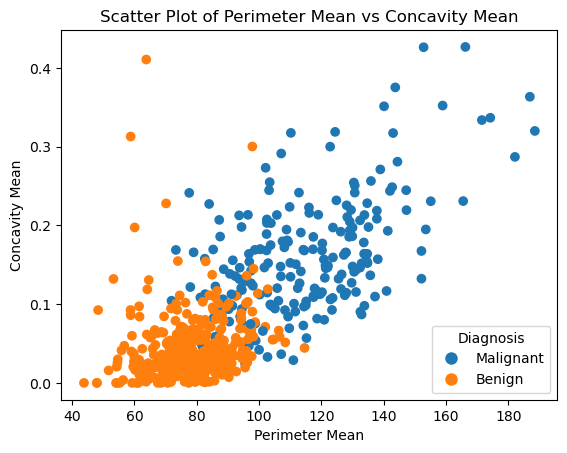

In [11]:
# Create mapping between values and colors
labels = cancer["diagnosis"].unique().tolist()
colors = list(mcolors.TABLEAU_COLORS.keys())
color_map = {l: colors[i % len(colors)] for i, l in enumerate(labels)}

# Plot
plt.scatter(cancer["perimeter_mean"], cancer['concavity_mean'], 
            color=cancer["diagnosis"].map(color_map))

# Create custom legend handles
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                      markersize=10, markerfacecolor=color_map[label])
           for label in labels]

# Add labels and legend
plt.xlabel('Perimeter Mean')
plt.ylabel('Concavity Mean')
plt.title('Scatter Plot of Perimeter Mean vs Concavity Mean')
plt.legend(handles=handles, title='Diagnosis')
plt.show()


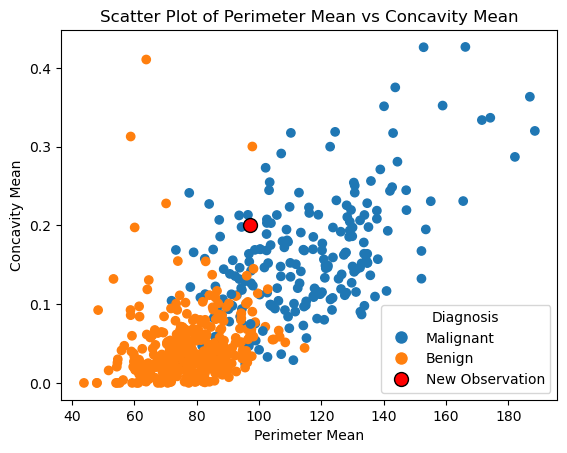

In [12]:
# trying K-neighbours manually for understanding

# Plot existing data
plt.scatter(cancer["perimeter_mean"], cancer['concavity_mean'], 
            color=cancer["diagnosis"].map(color_map))

# Create custom legend handles
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                      markersize=10, markerfacecolor=color_map[label])
           for label in labels]

# Add new observation
new_observation = {'perimeter_mean': 97, 'concavity_mean': 0.20}
plt.scatter(new_observation['perimeter_mean'], new_observation['concavity_mean'],
            color='red', edgecolor='black', s=100, label='New Observation')

# Add labels and legend
plt.xlabel('Perimeter Mean')
plt.ylabel('Concavity Mean')
plt.title('Scatter Plot of Perimeter Mean vs Concavity Mean')
plt.legend(handles=handles + [plt.Line2D([0], [0], marker='o', color='w', 
                                          markerfacecolor='red', markeredgecolor='black', 
                                          markersize=10, label='New Observation')], 
           title='Diagnosis')
# plt.show()

In [13]:
# working backwards to understand the new observation
# new observation
new_obs_perimeter = 97
new_obs_concavity = 0.2

In [14]:
# find the distance between the dataset and the new observation for the Perimeter
# same for concavity
# using the pythagoras formula 

# define a new column as the straight line distance
# from dataset to the new obs
cancer['dist_from_new'] = (
(cancer['perimeter_mean'] - new_obs_perimeter)**2 +
(cancer['concavity_mean'] - new_obs_concavity) **2
)**(1/2) # closing bracket must be on this last row in front of the square root function

In [15]:
# for example, let's use k = 5
# aka 5 nearest neighbours
# n.smallest for 5 returns us the 5 smallest distances
# for the columns we selected below
nearest_5 = cancer.nsmallest(5, "dist_from_new")[[
    "perimeter_mean",
    "concavity_mean",
    "diagnosis",
    "dist_from_new"
]]

In [16]:
nearest_5

,perimeter_mean,concavity_mean,diagnosis,dist_from_new
291,97.03,0.05940,Benign,0.143765
138,96.85,0.15390,Malignant,0.156924
15,96.73,0.16390,Malignant,0.272403
514,97.26,0.07486,Malignant,0.288548
54,97.26,0.05253,Malignant,0.298910


In [17]:
# 4 out of 5 of them are malignant
# so, we determine new observation is Malignant

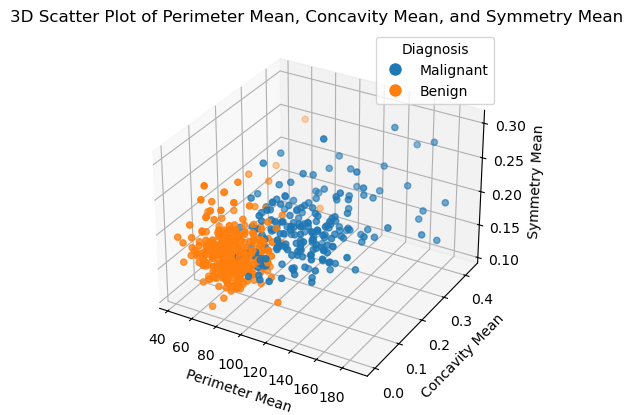

In [18]:
# so far we've only looked at 2 features
# what if we want 3 features?
# adding new feature, symmetry

# first expand scatterplot to be 3D
# Create mapping between values and colors
labels = cancer["diagnosis"].unique().tolist()
colors = list(mcolors.TABLEAU_COLORS.keys())
color_map = {l: colors[i % len(colors)] for i, l in enumerate(labels)}

# Create a 3D plot
ax = plt.axes(projection="3d")

# Plot data points with color corresponding to diagnosis
sc = ax.scatter3D(cancer['perimeter_mean'], cancer['concavity_mean'], cancer['symmetry_mean'], 
                  c=cancer['diagnosis'].map(color_map), marker='o')

# Add axis labels
ax.set_xlabel('Perimeter Mean')
ax.set_ylabel('Concavity Mean')
ax.set_zlabel('Symmetry Mean')
ax.set_title('3D Scatter Plot of Perimeter Mean, Concavity Mean, and Symmetry Mean')

# Create custom legend handles
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                      markersize=10, markerfacecolor=color_map[label])
           for label in labels]

# Add legend
plt.legend(handles=handles, title='Diagnosis')

# Show plot
plt.show()

In [19]:
# create our new observation with 3 features
# 3rd feature is symmetry
new_obs_perimeter = 97
new_obs_concavity = 0.2
new_obs_symmetry = 0.22

In [20]:
# note that since this is the same variable name as the 2 feature one, this will OVERRIDE that first variable
# save this as a new column called dist_from_new again
cancer['dist_from_new'] = (
(cancer['perimeter_mean'] - new_obs_perimeter)**2 +
(cancer['concavity_mean'] - new_obs_concavity)**2 +
(cancer['symmetry_mean'] - new_obs_symmetry)**2
)**(1/2)

In [21]:
# assumes k = 5 again
nearest_5 = cancer.nsmallest(5, "dist_from_new")[[
    "perimeter_mean",
    "concavity_mean",
    "symmetry_mean",
    "diagnosis",
    "dist_from_new"
]]

In [22]:
nearest_5

,perimeter_mean,concavity_mean,symmetry_mean,diagnosis,dist_from_new
291,97.03,0.05940,0.1879,Benign,0.147305
138,96.85,0.15390,0.1957,Malignant,0.158795
15,96.73,0.16390,0.2303,Malignant,0.272597
514,97.26,0.07486,0.1561,Malignant,0.295539
54,97.26,0.05253,0.1616,Malignant,0.304562


In [23]:
# above we were coding from scratch
# this was fine since we only had 1 new observation
# but what if we had 10 new observations?
# we can use scikit-learn package

In [24]:
# need to configure scikit learn to talk to and work with pandas
# the dataset is in a pandas dataframe
# want to use dataframe and not arrays

from sklearn import set_config
set_config(transform_output = "pandas")

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
cancer_train = cancer[["diagnosis", "perimeter_mean", "concavity_mean"]]
cancer_train

,diagnosis,perimeter_mean,concavity_mean
0,Malignant,122.80,0.30010
1,Malignant,132.90,0.08690
2,Malignant,130.00,0.19740
3,Malignant,77.58,0.24140
4,Malignant,135.10,0.19800
...,...,...,...
564,Malignant,142.00,0.24390
565,Malignant,131.20,0.14400
566,Malignant,108.30,0.09251
567,Malignant,140.10,0.35140


In [ ]:
# initialize our KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn

KNeighborsClassifier()

In [28]:
# predictor - x, response - y
# define predictor and response variables

x = cancer_train[["perimeter_mean", "concavity_mean"]]
y = cancer_train["diagnosis"]

In [30]:
# now we can fit our KNN model to our data

knn.fit(x,y)

KNeighborsClassifier()

In [31]:
# now that we've fit our model, next step is to make predictions
# based on unseen data

new_obs = pd.DataFrame({"perimeter_mean":[97], "concavity_mean":[0.20]})
new_obs

,perimeter_mean,concavity_mean
0,97,0.2


In [32]:
# now let's use the model to predict if the new_obs is M or B
knn.predict(new_obs)

array(['Malignant'], dtype=object)

In [ ]:
# same prediction as what we manually computed but way less steps and way less manual!

In [36]:
# class 2 - wk 1
# scaling the variables, since the first time we did this above
# perimeter_mean was much larger in scale than concavity
# creates skew / bias

# import packages we need 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

standardized_cancer = cancer.copy()

In [37]:
# don't need to scale ID or diagnosis
# below we list all the columns we DO NOT WANT TO SCALE

columns_to_exclude = ['id', 'diagnosis']
columns_to_scale = standardized_cancer.columns.difference(columns_to_exclude)

In [38]:
# Initialize the StandardScaler to standardize the selected numeric columns
scaler = StandardScaler()

# Apply the scaler to the selected columns. This transforms the data so that each feature
# has a mean of 0 and a standard deviation of 1, which is essential to prevent larger
# scale features from dominating the analysis, especially for distance-based algorithms like KNN.
standardized_cancer[columns_to_scale] = scaler.fit_transform(cancer[columns_to_scale])

# Output the standardized dataframe with the scaled numeric columns
standardized_cancer


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,dist_from_new
0,842302,Malignant,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0.382425
1,842517,Malignant,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,1.101023
2,84300903,Malignant,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0.894679
3,84348301,Malignant,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,-0.071510
4,84358402,Malignant,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,1.257537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,Malignant,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,...,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091,1.748463
565,926682,Malignant,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,...,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978,0.980062
566,926954,Malignant,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,...,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409,-0.649193
567,927241,Malignant,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,...,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635,1.613297


In [ ]:
# set seed - to test our data
# ensures that the random numbers that we have like the data split remains the same each time we run the cell block
np.random.seed(1)

# split the data
cancer_train, cancer_test = train_test_split(
    standardized_cancer, train_size=0.75, shuffle = True,
    stratify=standardized_cancer["diagnosis"]
)


#train_size means 75% of data used to train model
# reamining 25% used to test the model we build
# shuffle means we shuffle the rows
# stratify means keeping the portions of our data (aka proportion of M and B) to be the same and representative of the actual whole dataset


In [ ]:
cancer_train.info # shows 426 rows which is 75% of dataset 
# this is the set used to TRAIN

<bound method DataFrame.info of             id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
164    8712289  Malignant     2.596659      0.640025        2.476807   
28      852973  Malignant     0.333066      1.391668        0.429654   
378    9013594     Benign    -0.132717     -0.963324       -0.152364   
131       8670  Malignant     0.378508      0.044296        0.400820   
233   88206102  Malignant     1.812780      1.982743        1.747740   
..         ...        ...          ...           ...             ...   
360  901034302     Benign    -0.450813     -0.283820       -0.516897   
301     892604     Benign    -0.473535      0.139706       -0.475295   
406     905189     Benign     0.571638     -1.030809        0.507915   
27      852781  Malignant     1.273153      0.223480        1.241101   
284    8912284     Benign    -0.351408     -0.835335       -0.324951   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
164   2.932585        -0.851870   

In [43]:
# now that we have our training and testing split
# now we can build our model!

# let's randomly pick a k number of 5
# k = 5
knn = KNeighborsClassifier (n_neighbors = 5)
knn

KNeighborsClassifier()

In [47]:
# now let's define our variables
X = cancer_train[["perimeter_mean", "concavity_mean"]]
# X is the predictor so good syntax is to capitalize it!
y = cancer_train['diagnosis'] # this is what we're predicting on

In [48]:
# now let's fit our model!
knn.fit(X,y)

KNeighborsClassifier()

In [ ]:
cancer_test['predicted'] = knn.predict(cancer_test[["perimeter_mean", "concavity_mean"]])

cancer_test[["diagnosis", "predicted"]]

# once we run this, it shows that our model is accurate
# we predicted Benign and Malignant when it actually was!

,diagnosis,predicted
357,Benign,Benign
361,Benign,Benign
212,Malignant,Malignant
527,Benign,Benign
21,Benign,Benign
...,...,...
364,Benign,Benign
434,Benign,Benign
299,Benign,Benign
488,Benign,Benign


In [52]:
# now let's see how good our model is 
# let's look at accuracy (in scikit learn) - how often our model's predictions were correct
# do this using score method

# everything in the SQUARE brackets is our predictors which is the X variables
knn.score(cancer_test[["perimeter_mean", "concavity_mean"]], cancer_test["diagnosis"])

# we putthe cancer_train diagnosis there at the end as it is the ACTUAL

0.9230769230769231

In [54]:
# but accuracy tells us how many CORRECT predictions we made
# doesn't tell us where the errors are 
# so to do this we can view confusion matrix using cross tab function in pandas

# create confusion matrix
pd.crosstab(
    cancer_test["diagnosis"],
    cancer_test["predicted"],
    rownames = ["Actual"], # adding row names to make it clearer, this is the ACTUAL dataset
    colnames = ["Predicted"]
)

Predicted,Benign,Malignant
Actual,,
Benign,88,2
Malignant,9,44


In [ ]:
# how to read the confusion matrix above
# rows are ACTUAL labels, columns are PREDICTED labels
# top left corner = TN (true negatives) - actually Benign, predicted Benign
# bottom right corner = TP (true positives) - actually M, predicted M
# top right corner = FP
# bottom left corner = FN 

In [ ]:
# let's look at precision and recall
precision_score(
    y_true = cancer_test["diagnosis"],
    y_pred = cancer_test['predicted'],
    pos_label = "Malignant"
)

# looking at confusion matrix it's calculating
# 44 / 46 (44 + 2) -- aka looking vertically

0.9565217391304348

In [ ]:
# recall score- high recall score means if there is a M tumor, the classifier is LIKELY to find it
recall_score(
    y_true = cancer_test['diagnosis'],
    y_pred = cancer_test['predicted'],
    pos_label = "Malignant"
)

# looking at ocnfusion matrix it's calc'd as:
# 44 / 53 (53 = 44 + 9) -- looking in row horizontally


0.8301886792452831

In [58]:
# so far we've just been randomly picking k
# but we should actually pick k to maximize model's ACCURACY on unseen data

# need to resplit data into training and testing set

cancer_subtrain, cancer_validation = train_test_split(cancer_train, train_size = 0.75,
                                                      stratify = cancer_train["diagnosis"])

In [ ]:
# still arbitrarily picking a k-value for the below code
# initialized model
# specified our variables (X,y) and that we want k of 3
# then also fit model to data
knn = KNeighborsClassifier(n_neighbors = 3)
X = cancer_subtrain[["perimeter_mean", "concavity_mean"]]
y = cancer_subtrain["diagnosis"]
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# compute score on validation
acc = knn.score(
    cancer_validation[["perimeter_mean", "concavity_mean"]],
    cancer_validation[["diagnosis"]]
)
acc

# each time we run this code, we will get a DIFFERENT accuracy value!
# it will keep changing
# accuracy estimation changes based on our split 
# we did NOT set a seed above - so depending on the way our data is split, it will change our accuracy

# hence this is why we need cross validation!
# more efficient way to evaluate model's accuracy

0.8785046728971962

In [63]:
# cross-validation using 5 folds
# need to provide with predictor and response labels
# using scikit learn
# convert result into pandas dataframe for ease of reading

knn = KNeighborsClassifier(n_neighbors=3)
X = cancer_train[["perimeter_mean", "concavity_mean"]]
y = cancer_train['diagnosis']
# we don't need to do it on subtrain because we're using cross validation
# this will automatically split our data for training and validation purposes

returned_dictionary = cross_validate(
    estimator = knn,
    cv = 5,
    X = X,
    y = y
)

cv_5_df = pd.DataFrame(returned_dictionary)
cv_5_df

# this function automatically handles stratification
# also auto handles splitting data for validation and for testing/training

,fit_time,score_time,test_score
0,0.002527,0.005565,0.930233
1,0.002014,0.004716,0.894118
2,0.002013,0.002495,0.870588
3,0.001028,0.003554,0.952941
4,0.002004,0.005182,0.917647


In [71]:
cv_5_metrics = cv_5_df.agg(["mean", "sem"])
cv_5_metrics

# fit_time: The time for fitting the estimator on the train set for each cv split. 
# score_time: The time for scoring the estimator on the test set for each cv split.
# test_score: The score array for test scores on each cv split. This tells us the performance on each cv split

,fit_time,score_time,test_score
mean,0.001917,0.004302,0.913105
sem,0.000244,0.000564,0.014264


In [ ]:
# number of folds represents how many parts we're dividing the training data into
# k for number of neighbours is number of nearest neighbours model is looking at to make its predictions

In [75]:
parameter_grid = {
    "n_neighbors" : range(1,100,5)
}

In [76]:
# grid search allows us to perform cross validation across multiple values of k
# on the defined parameters as below

cancer_tune_grid = GridSearchCV(
    estimator = knn, # specifying parameter we want to tune
    param_grid = parameter_grid, 
    cv = 10 # splitting data into 10 equal folds
)

# so what this does is it tests 20 different 'k's - because k spans 1 to 100 in increments of 5
# so you're doing cross-validation on each value of k
# so it's tuning it 20 diff times

In [77]:
# now we can fit the grid search CV to the training data
# save as object called cancer_tune_grid

cancer_tune_grid.fit(
    cancer_train[["perimeter_mean", "concavity_mean"]],
    cancer_train['diagnosis']
)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': range(1, 100, 5)})

In [80]:
# we decide which K is best by comparing accuracy to k

accuracy_grid = pd.DataFrame(cancer_tune_grid.cv_results_)
accuracy_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002834,0.002205,0.003917,0.001219,1,{'n_neighbors': 1},0.953488,0.837209,0.906977,0.860465,0.813953,0.837209,0.880952,0.904762,0.880952,0.880952,0.875692,0.038684,20
1,0.001921,0.000606,0.003959,0.000739,6,{'n_neighbors': 6},0.930233,0.953488,0.906977,0.837209,0.837209,0.906977,0.928571,0.928571,0.880952,0.976190,0.908638,0.043373,18
2,0.001803,0.000310,0.003753,0.000582,11,{'n_neighbors': 11},0.906977,0.930233,0.906977,0.837209,0.837209,0.883721,0.952381,0.904762,0.928571,0.952381,0.904042,0.039147,19
3,0.002015,0.000275,0.003479,0.000258,16,{'n_neighbors': 16},0.906977,0.953488,0.930233,0.837209,0.837209,0.930233,0.952381,0.952381,0.928571,0.976190,0.920487,0.045315,1
4,0.002159,0.000503,0.003531,0.000311,21,{'n_neighbors': 21},0.906977,0.953488,0.930233,0.837209,0.837209,0.906977,0.952381,0.952381,0.880952,0.976190,0.913400,0.046495,11
5,0.002058,0.000582,0.003625,0.000616,26,{'n_neighbors': 26},0.906977,0.953488,0.930233,0.837209,0.837209,0.906977,0.952381,0.928571,0.904762,0.976190,0.913400,0.043989,11
6,0.001910,0.000295,0.003523,0.000210,31,{'n_neighbors': 31},0.906977,0.953488,0.930233,0.837209,0.837209,0.906977,0.952381,0.928571,0.904762,0.976190,0.913400,0.043989,11
7,0.001676,0.000595,0.003596,0.000421,36,{'n_neighbors': 36},0.906977,0.953488,0.930233,0.837209,0.837209,0.883721,0.928571,0.952381,0.904762,0.976190,0.911074,0.044873,16
8,0.001617,0.000588,0.003420,0.000371,41,{'n_neighbors': 41},0.906977,0.953488,0.930233,0.837209,0.837209,0.883721,0.952381,0.928571,0.904762,0.976190,0.911074,0.044873,16
9,0.002029,0.000486,0.003411,0.000211,46,{'n_neighbors': 46},0.906977,0.953488,0.930233,0.837209,0.837209,0.906977,0.952381,0.952381,0.904762,0.976190,0.915781,0.045368,8


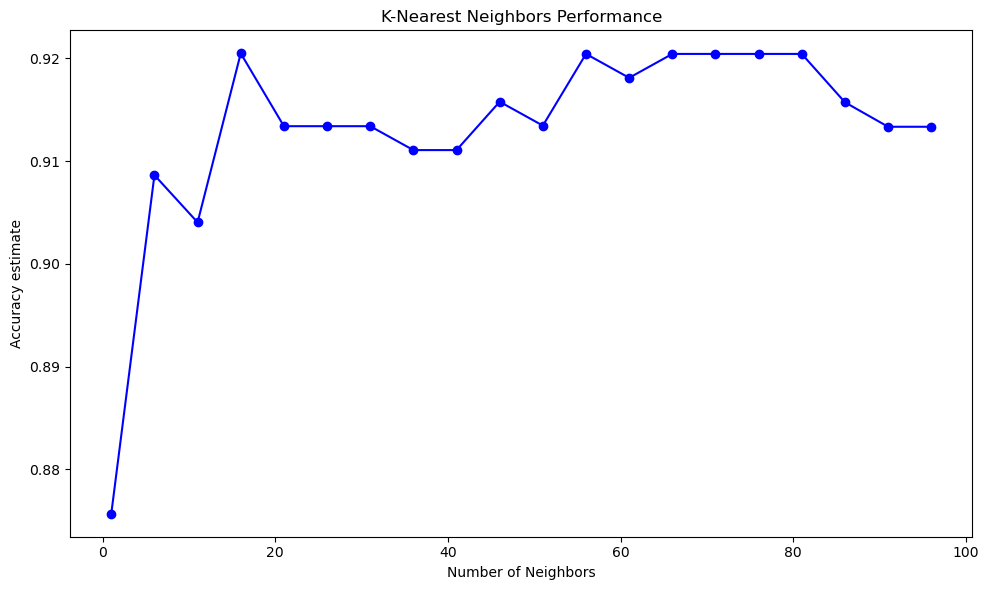

In [81]:
# plotting each value of K by their mean accuracy values
# Create the plot
plt.figure(figsize=(10, 6))

# Plot mean test scores with error bars
plt.plot(accuracy_grid['param_n_neighbors'], accuracy_grid['mean_test_score'], '-o', color='blue')

# Add labels and legend
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy estimate')
plt.title('K-Nearest Neighbors Performance')
plt.tight_layout()
plt.show()

In [ ]:
# to immediately see what the best neighbour is
cancer_tune_grid.best_params_

# this tells us that the best k value for accuracy is 16
# we can also see this in the plot above

{'n_neighbors': 16}